In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# **Loading the dataset**

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print('x_train_full shape', x_train_full.shape)
print('y_train_full shape', y_train_full.shape)

x_train_full shape (60000, 28, 28)
y_train_full shape (60000,)


## **Sample Image**

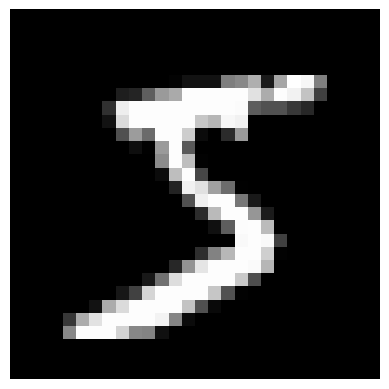

In [ ]:
sample= x_train_full[:1]
sample= sample.reshape(28,28)
plt.imshow(sample, cmap='gray')
plt.axis('off')
plt.show()

# **Normalizing the Data**

In [ ]:
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

## **Flatening the data**

In [ ]:
x_train_full = x_train_full.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# **Train and test dataset splitting**

In [ ]:
selected_digits = [2, 8]
all_digits = [0,1,2, 3, 4, 5, 6, 7, 8, 9]

# Filter training data (only keep digits 2 and 8)
train_mask = np.isin(y_train_full, selected_digits)  # True for digits 2 and 8
x_train_binary = x_train_full[train_mask]
y_train_binary = y_train_full[train_mask]

In [ ]:
test_mask = np.isin(y_test, selected_digits)  # True for digits 2 and 8
x_test_binary = x_test[test_mask]
y_test_binary = y_test[test_mask]

In [ ]:
print(f"Filtered x_train shape: {x_train_binary.shape}")
print(f"Filtered y_train shape: {y_train_binary.shape}")
print(f"Filtered x_test shape: {x_test_binary.shape}")
print(f"Filtered y_test shape: {y_test_binary.shape}")

Filtered x_train shape: (11809, 784)
Filtered y_train shape: (11809,)
Filtered x_test shape: (2006, 784)
Filtered y_test shape: (2006,)


# **Setting class 0 and 1 for binary classification**

In [ ]:
y_train_binary = np.where(y_train_binary == selected_digits[0], 0, 1)
y_test_binary = np.where(y_test_binary == selected_digits[0], 0, 1)

# **Splitting dataset into training and validation datasets**

In [ ]:
x_train_binary, x_val_binary, y_train_binary, y_val_binary = train_test_split(x_train_binary, y_train_binary, test_size=0.2, random_state=42)

# **MNIST binary classification using ANN**

###**2 hiddlen layer ann without optimizer and without early stopping**

In [ ]:
def create_2layers_ann():
    model = models.Sequential([
        layers.InputLayer(input_shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

# **Model Explanation**
- Created 2 hidden layer model, 1 i/p layer, 2 hidden layers and 1 o/p layer.
- 1st hidden layer has 128 units mean 784 i/p units transformed to 128 units.
- 2nd layer has 64 units and final output layer has 1 unit as it is binary classifier.
- binary cross entropy loss function is used for pediction probabilities

In [ ]:
model = create_2layers_ann()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

In [ ]:
history = model.fit(x_train_binary, y_train_binary, epochs=100,validation_data=(x_val_binary, y_val_binary))

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9414 - loss: 0.1513 - val_accuracy: 0.9869 - val_loss: 0.0363
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0355 - val_accuracy: 0.9881 - val_loss: 0.0393
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.9860 - val_loss: 0.0435
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9955 - loss: 0.0135 - val_accuracy: 0.9886 - val_loss: 0.0369
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9967 - loss: 0.0104 - val_accuracy: 0.9941 - val_loss: 0.0193
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 0.9945 - val_loss: 0.0137
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0035 - val_accuracy: 0.9936 - val_loss: 0.0200
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accu

## **Prediction**

In [ ]:
y_pred_binary = (model.predict(x_test_binary) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## **Prediction sample**

In [ ]:
y_pred_df = pd.DataFrame(y_pred_binary, columns=['Prediction'])
x_test_df = pd.DataFrame(x_test_binary)
result_df = pd.concat([x_test_df, y_pred_df], axis=1)
result_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Prediction
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


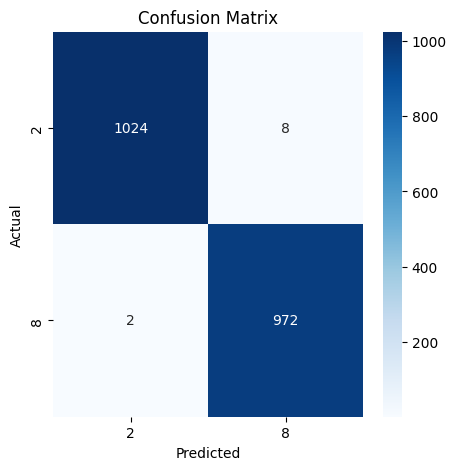

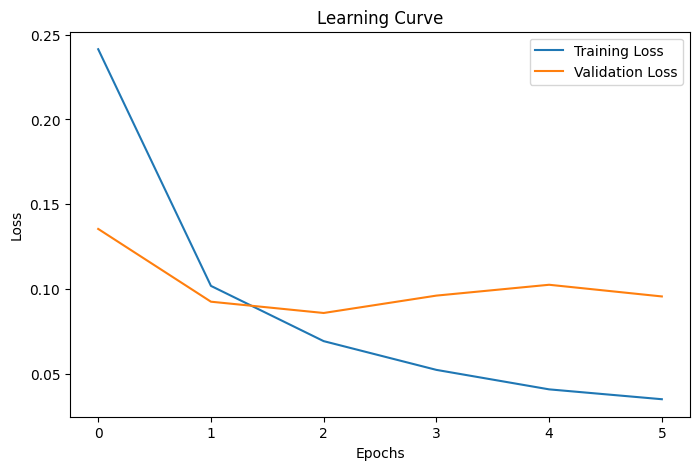

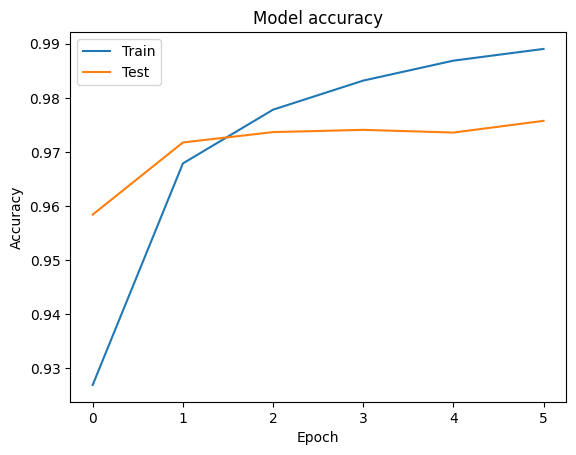

Test Accuracy: 0.9950


In [ ]:
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_binary, annot=True, fmt="d", cmap="Blues", xticklabels=selected_digits, yticklabels=selected_digits)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()


plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Print final accuracy
final_accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Test Accuracy: {final_accuracy:.4f}")

- confusion matrix shows few miss classified instances.
- After two epochs gap between training and validation loss increases it shows overfitting
- consequently accuracy also decreases as number of epochs increases

## **Test accuracy and Test loss**

In [ ]:
test_loss, test_acc = model.evaluate(x_test_binary, y_test_binary, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

63/63 - 0s - 7ms/step - accuracy: 0.9950 - loss: 0.0296
Test accuracy: 0.9950149655342102
Test loss: 0.029629167169332504


###**2a with early stopping**

In [ ]:
def create_2layers_ann_with_optimizer():
    model = models.Sequential([
        layers.InputLayer(input_shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## **Model Details**
- similar to previous model here also same parameters are used.
- Additionally adam optimize is used to minimize the loss function and avoid overfitting
- in below cells also added early stopping criteria with patience 3 and restore_best_weights as True

In [ ]:
model1 = create_2layers_ann_with_optimizer()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model1.summary()

Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_280 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_281 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_282 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history1 = model1.fit(x_train_binary, y_train_binary, epochs=100, validation_data=(x_val_binary, y_val_binary), callbacks=[early_stopping])

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9385 - loss: 0.1642 - val_accuracy: 0.9848 - val_loss: 0.0403
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0248 - val_accuracy: 0.9894 - val_loss: 0.0250
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9963 - loss: 0.0128 - val_accuracy: 0.9873 - val_loss: 0.0320
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.0149 - val_accuracy: 0.9936 - val_loss: 0.0170
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9973 - loss: 0.0066 - val_accuracy: 0.9928 - val_loss: 0.0190
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9915 - val_loss: 0.0246
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9973 - loss: 0.0069 - val_accuracy: 0.9941 - val_loss: 0.0190


In [ ]:
y_pred_binary1 = (model1.predict(x_test_binary) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


## **Model Prediction sample**

In [ ]:
y_pred_df = pd.DataFrame(y_pred_binary1, columns=['Prediction'])
x_test_df = pd.DataFrame(x_test_binary)
result_df = pd.concat([x_test_df, y_pred_df], axis=1)
result_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Prediction
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


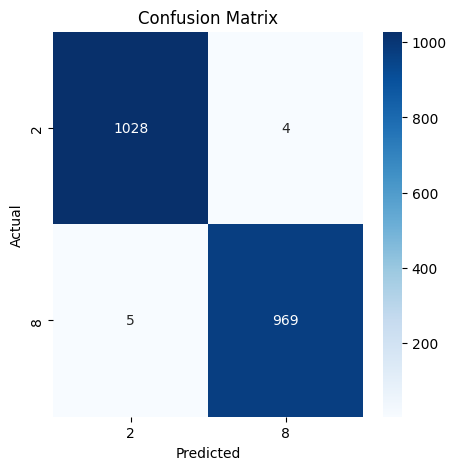

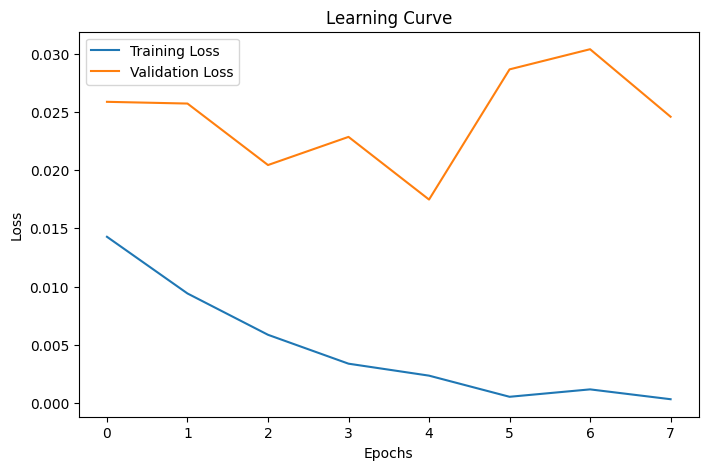

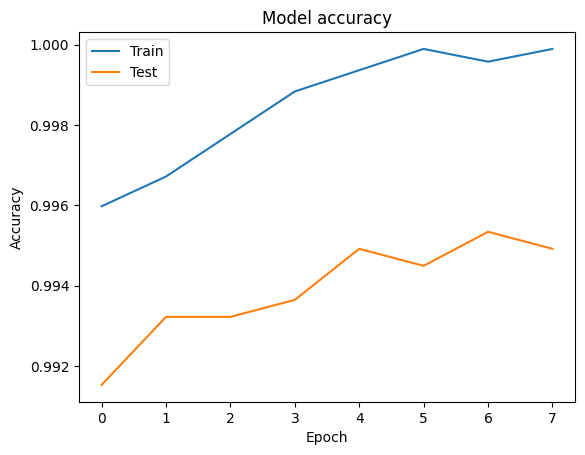

Test Accuracy: 0.9955


In [ ]:
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary1)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_binary, annot=True, fmt="d", cmap="Blues", xticklabels=selected_digits, yticklabels=selected_digits)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(history1.history["loss"], label="Training Loss")
plt.plot(history1.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Print final accuracy
final_accuracy = accuracy_score(y_test_binary, y_pred_binary1)
print(f"Test Accuracy: {final_accuracy:.4f}")

In [ ]:
test_loss, test_acc = model1.evaluate(x_test_binary, y_test_binary, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

63/63 - 0s - 3ms/step - accuracy: 0.9955 - loss: 0.0220
Test accuracy: 0.9955134391784668
Test loss: 0.021950658410787582


###**2a ANN with 3 hidden layers, adam optimizer and early stopping**

In [ ]:
def create_ann_3layers():
    model2 = models.Sequential([
        layers.InputLayer(input_shape=(784,)),  # Flattened input (28x28 image)
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid output layer for binary classification
    ])
    model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model2

model2 = create_ann_3layers()
early_stopping2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history3 = model2.fit(x_train_binary, y_train_binary, epochs=100, validation_data=(x_val_binary, y_val_binary), callbacks=[early_stopping2])
y_pred2_binary = (model2.predict(x_test_binary) > 0.5).astype("int32")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9499 - loss: 0.1445 - val_accuracy: 0.9894 - val_loss: 0.0304
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9920 - loss: 0.0266 - val_accuracy: 0.9915 - val_loss: 0.0217
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.9860 - val_loss: 0.0364
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9955 - loss: 0.0117 - val_accuracy: 0.9945 - val_loss: 0.0222
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9977 - loss: 0.0062 - val_accuracy: 0.9941 - val_loss: 0.0170
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9970 - loss: 0.0090 - val_accuracy: 0.9941 - val_loss: 0.0303
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9972 - loss: 0.0070 - val_accuracy: 0.9915 - val_loss: 0.0256
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accu

## **Sample prediction**

In [ ]:
y_pred_df = pd.DataFrame(y_pred2_binary, columns=['Prediction'])
x_test_df = pd.DataFrame(x_test_binary)
result_df = pd.concat([x_test_df, y_pred_df], axis=1)
result_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Prediction
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


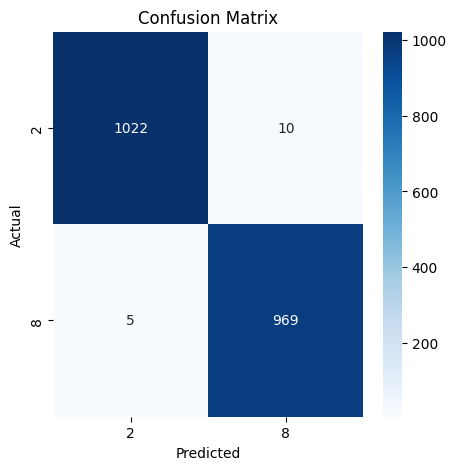

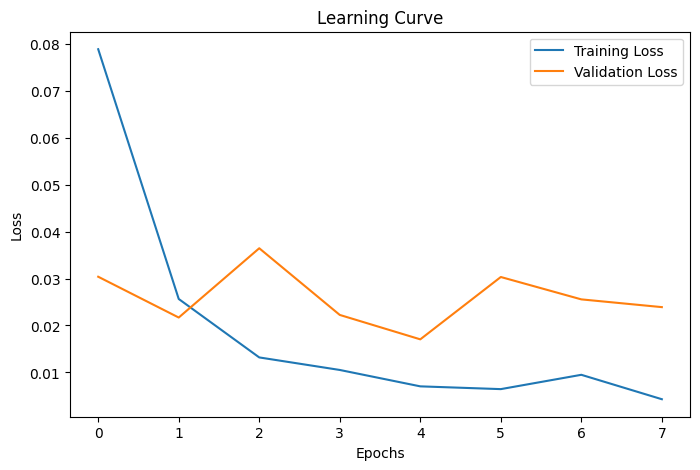

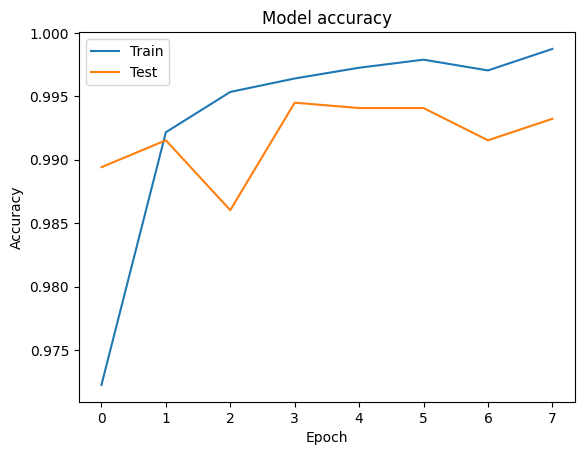

Test Accuracy: 0.9925


In [ ]:
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred2_binary)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_binary, annot=True, fmt="d", cmap="Blues", xticklabels=selected_digits, yticklabels=selected_digits)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history3.history["loss"], label="Training Loss")
plt.plot(history3.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()


plt.figure()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Print final accuracy
final_accuracy = accuracy_score(y_test_binary, y_pred2_binary)
print(f"Test Accuracy: {final_accuracy:.4f}")

##**Analysis**
- When predicted using 100 epoch with and without early stopping, the accuracy is 0.995. This means we can achive same accuracy without exhaustive number of epoch.
- The confusion matrix also shows similar results.
- If we compare learning curves, training loss and validation loss rapidly decreases at start.
- Then as epoch increases validation loss increases after initial decrease.
- Increase in gap between validation and training loss shows overfitting.
- After early stopping as well model accuracy is almost same this shows model converge before early stopping could come in play
- When I increased hidden layer model became more complex and overfitting happened hence accuracy might have been decreased.

# **Performance Comparison of Various Activation Functions and Weight Initialization Techniques**

In [ ]:
def build_binary_ann(initializer, activation):
    model = models.Sequential([
        layers.Dense(128, activation=activation, kernel_initializer=initializer, input_shape=(28*28,)),
        layers.Dense(64, activation=activation, kernel_initializer=initializer),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


- For this model various initializers are passed and activation functions are passed.
- final o/p layer uses sigmoid function

In [ ]:
def binary_ann_withplots(x_trainset, y_trainset, x_valset, y_valset, x_testset, y_testset, initializer='glorot_uniform', activation='relu'):
        model3 = build_binary_ann(initializer=initializer, activation=activation)
        model3.compile(loss='binary_crossentropy', metrics=['accuracy'])
        history3 = model3.fit(x_trainset, y_trainset, validation_data=(x_valset, y_valset), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

        model3.summary()
        test_loss, test_acc = model3.evaluate(x_testset, y_testset, verbose=0)
        precision_score = model3.evaluate(x_testset, y_testset, verbose=0)[1]
        recall_score = model3.evaluate(x_testset, y_testset, verbose=0)[1]
        f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
        y_pred = (model3.predict(x_testset) > 0.5).astype(int)
        conf_matrix = confusion_matrix(y_testset, y_pred)

        y_pred_df = pd.DataFrame(y_pred, columns=['Prediction'])
        x_test_df = pd.DataFrame(x_testset)
        result_df = pd.concat([x_test_df, y_pred_df], axis=1)
        result_df.tail()

        # Store results
        print({'Initializer': initializer, 'Activation': activation})
        print(f"Test accuracy: {test_acc}")
        print(f"Test loss: {test_loss}")
        print(f"Precision: {precision_score}")
        print(f"Recall: {recall_score}")
        print(f"F1 Score: {f1_score}")

        # Plot confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=selected_digits, yticklabels=selected_digits)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix ({initializer}, {activation})')
        plt.show()

        # Plot learning curve
        plt.plot(history3.history['loss'], label='Train Loss')
        plt.plot(history3.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.title(f'Learning Curve ({initializer}, {activation})')
        plt.show()

        plt.figure()
        plt.plot(history3.history['accuracy'])
        plt.plot(history3.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'])
        plt.show()

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_265 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_266 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_267 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
{'Initializer': 'random_normal', 'Activation': 'relu'}
Test accuracy: 0.9930209517478943
Test loss: 0.021403934806585312
Precision: 0.9930209517478943
Recall: 0.9930209517478943
F1 Score: 0.9930209517478943


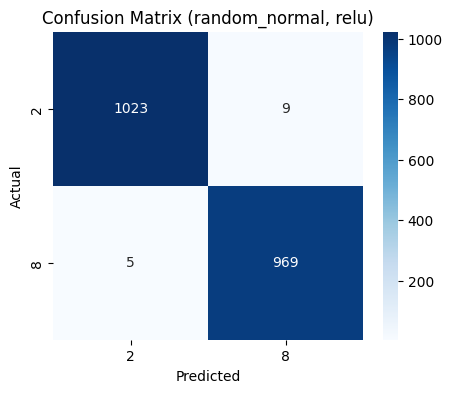

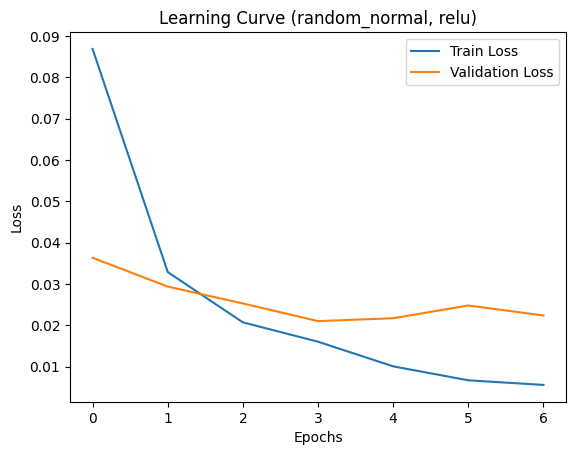

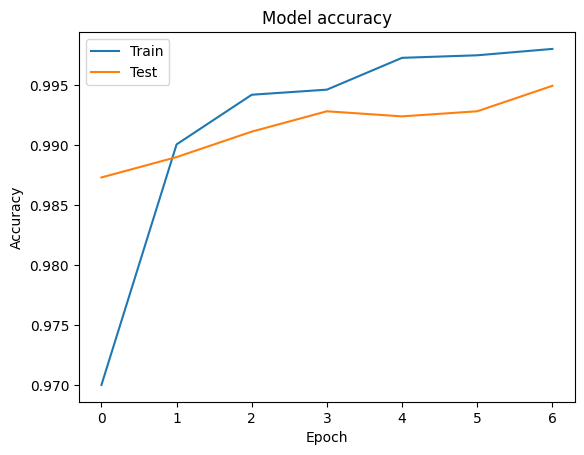

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'random_normal', 'relu')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_237 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_238 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Initializer': 'random_normal', 'Activation': 'sigmoid'}
Test accuracy: 0.9935194253921509
Test loss: 0.018358852714300156
Precision: 0.9935194253921509
Recall: 0.9935194253921509
F1 Score: 0.9935194253921509


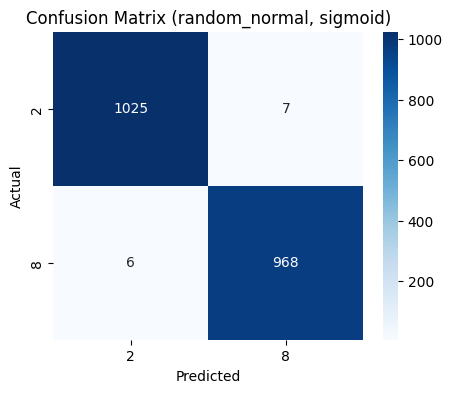

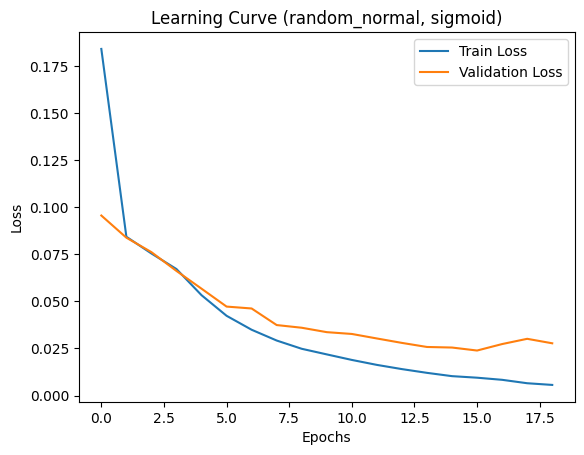

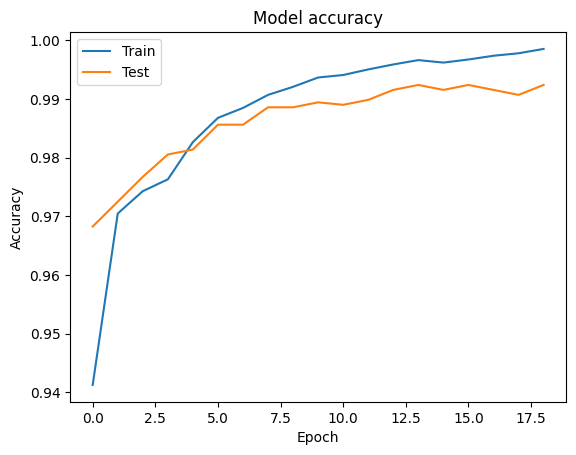

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'random_normal', 'sigmoid')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_240 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_242 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Initializer': 'random_normal', 'Activation': 'tanh'}
Test accuracy: 0.9910269379615784
Test loss: 0.026114478707313538
Precision: 0.9910269379615784
Recall: 0.9910269379615784
F1 Score: 0.9910269379615784


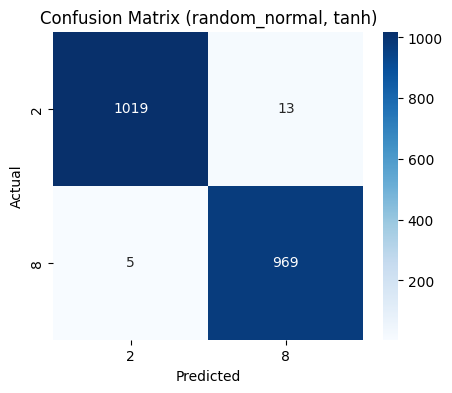

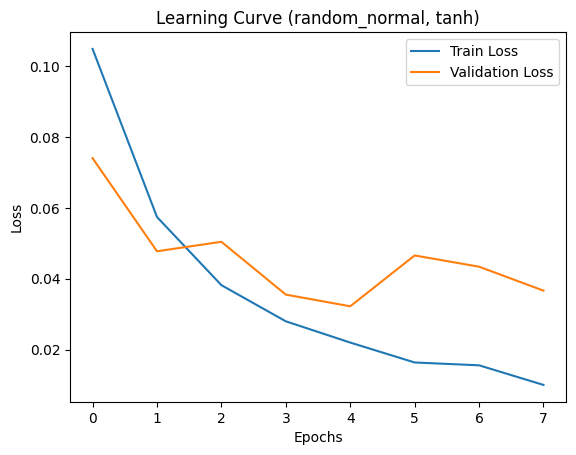

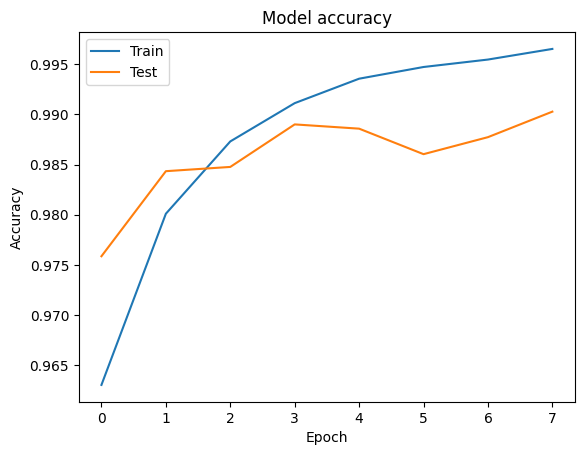

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'random_normal', 'tanh')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_243 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_244 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_245 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Initializer': 'he_normal', 'Activation': 'relu'}
Test accuracy: 0.9965104460716248
Test loss: 0.01619187742471695
Precision: 0.9965104460716248
Recall: 0.9965104460716248
F1 Score: 0.9965104460716248


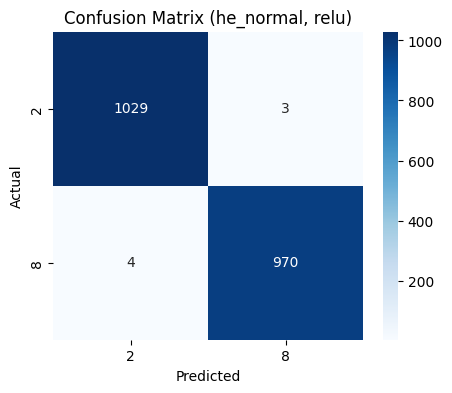

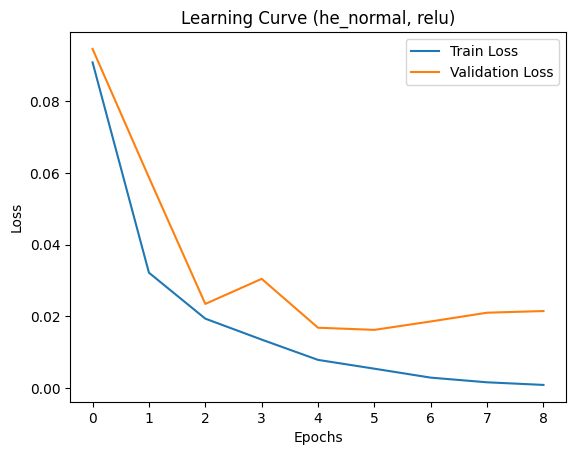

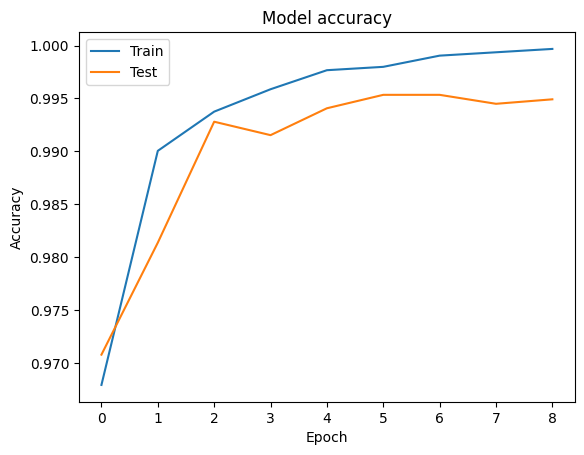

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'he_normal', 'relu')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_246 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
{'Initializer': 'he_normal', 'Activation': 'sigmoid'}
Test accuracy: 0.991525411605835
Test loss: 0.021741706877946854
Precision: 0.991525411605835
Recall: 0.991525411605835
F1 Score: 0.991525411605835


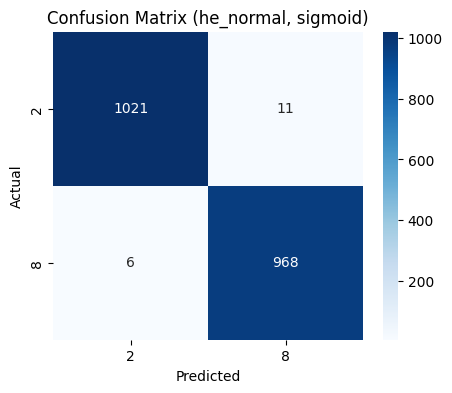

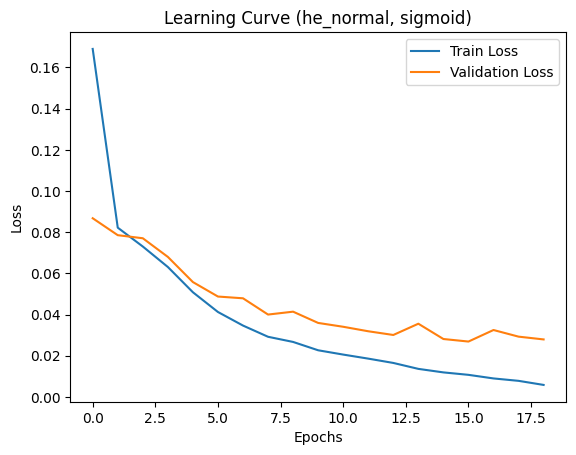

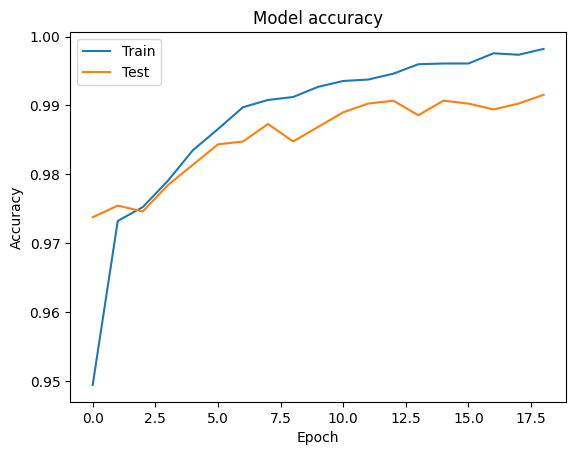

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'he_normal', 'sigmoid')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_249 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_250 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_251 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Initializer': 'he_normal', 'Activation': 'tanh'}
Test accuracy: 0.9925224184989929
Test loss: 0.021148357540369034
Precision: 0.9925224184989929
Recall: 0.9925224184989929
F1 Score: 0.9925224184989929


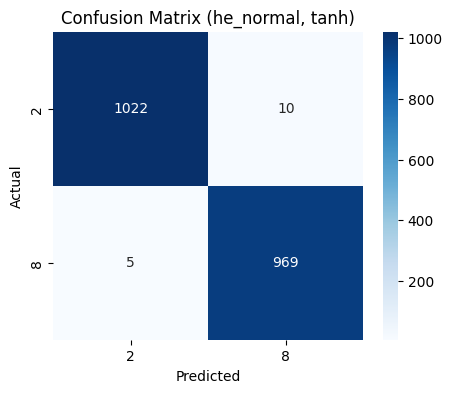

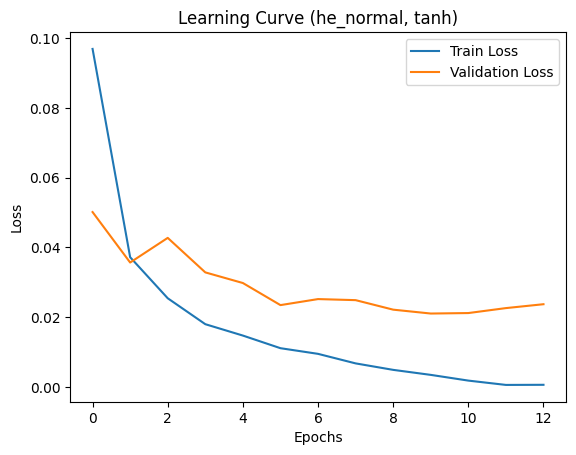

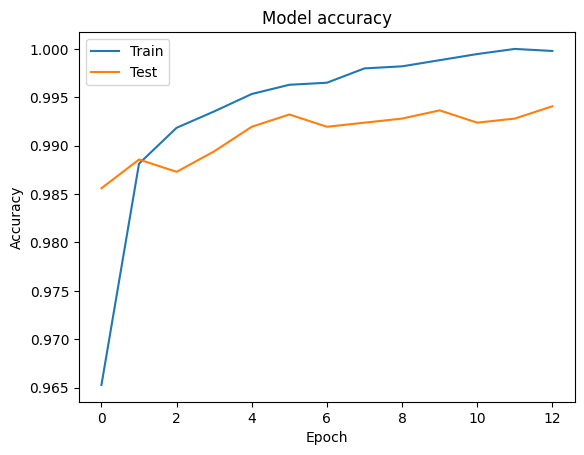

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'he_normal', 'tanh')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_252 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_253 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_254 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Initializer': 'glorot_uniform', 'Activation': 'relu'}
Test accuracy: 0.9960119724273682
Test loss: 0.014160824939608574
Precision: 0.9960119724273682
Recall: 0.9960119724273682
F1 Score: 0.9960119724273682


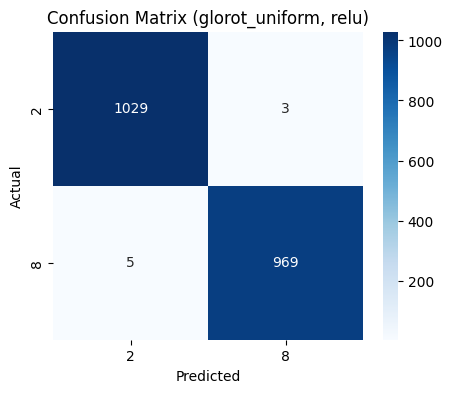

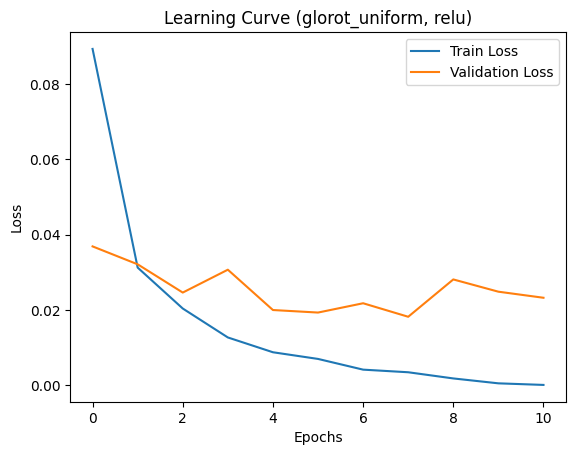

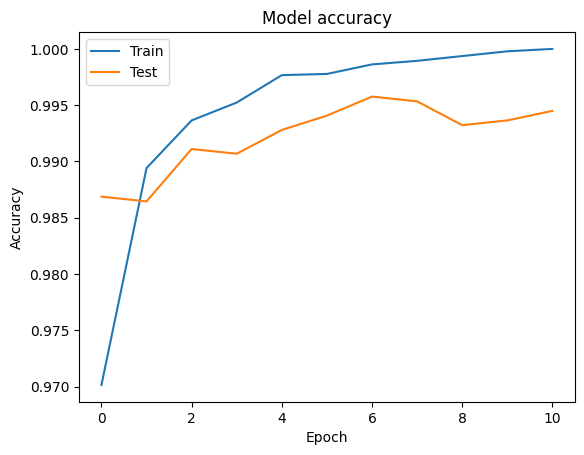

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'glorot_uniform', 'relu')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_255 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_256 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Initializer': 'glorot_uniform', 'Activation': 'sigmoid'}
Test accuracy: 0.991525411605835
Test loss: 0.0252386424690485
Precision: 0.991525411605835
Recall: 0.991525411605835
F1 Score: 0.991525411605835


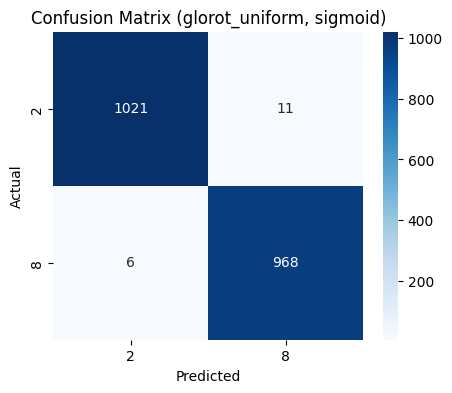

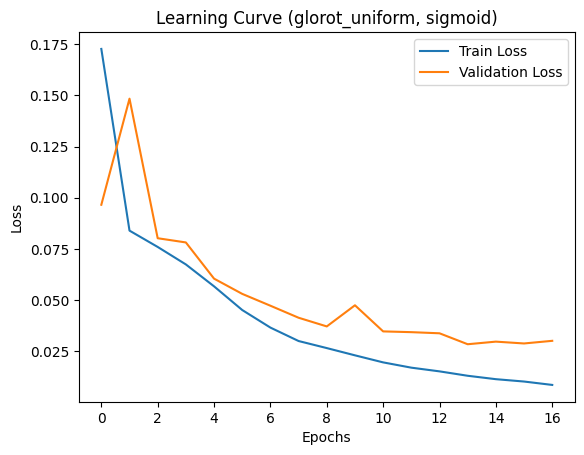

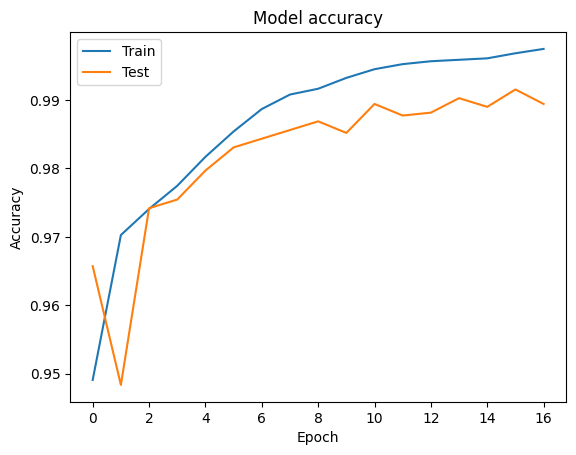

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'glorot_uniform', 'sigmoid')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_258 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_260 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,604 (850.02 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,803 (425.02 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Initializer': 'glorot_uniform', 'Activation': 'tanh'}
Test accuracy: 0.9910269379615784
Test loss: 0.02791617624461651
Precision: 0.9910269379615784
Recall: 0.9910269379615784
F1 Score: 0.9910269379615784


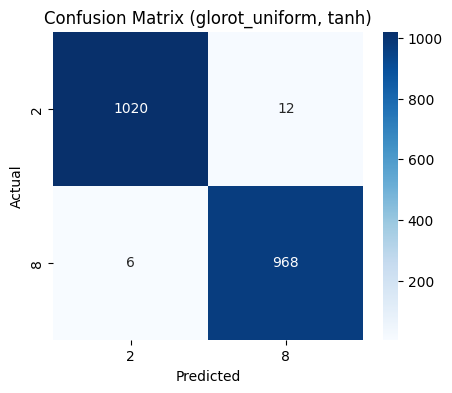

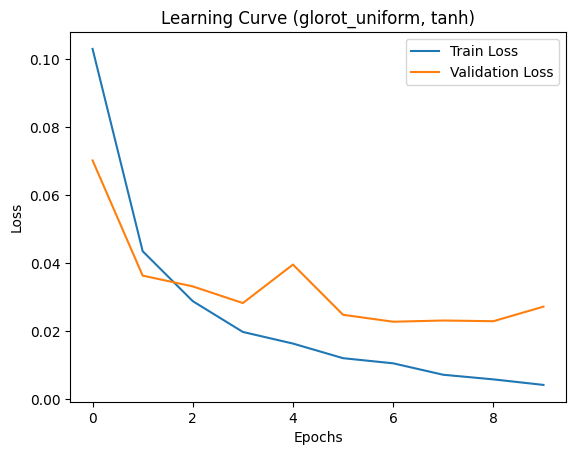

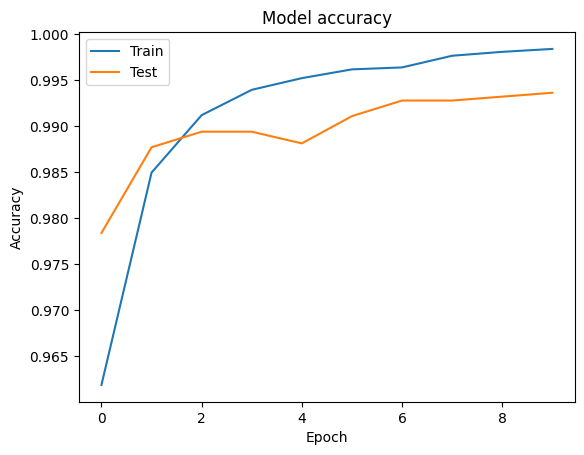

In [ ]:
binary_ann_withplots(x_train_binary, y_train_binary, x_val_binary, y_val_binary, x_test_binary, y_test_binary, 'glorot_uniform', 'tanh')

## **Comparative analysis of all initializers and activation functions**

Selection of initializers decides proper initial weights and activation function introduces non-linearity in the network so that model will learn complex pattern easily.

- Random Normal initializer initializes the weights based on normal distribution with mean and sd. it could cause problem of vanising gradient or exploding gradient.
- Xavier aka Glorot scales gradient by sqaure root of input and output to avoid exploding and demenising gradients.
- Simillarly He also maintain some variance to avoid vanising and exploding gradient issues.

Now comparing all graphs -
1. Random Normal Initializer -
- Random Normal initializer performed best with Tanh and ReLu with minimum false positive and false negative compared to sigmoid.
- ReLU showed sharp decrease in learning loss compared to others and least overfitting.
- ReLU has higher accuracy and diffrence in training and testing accuracy is small hence better generalization
- tanh performed better than sigmoid with better accuracy and generalization.

2. He Normal -
- Simillar to Random Normalizer ReLU performbed better in terms of accuracy and generalization.
- Tanh performed better than Sigmoid.
- Since He Normalizer maintains variance and ReLU removes half of the variance by removing negative values, these two works best.

3. Xavier -
- Usually ReLU does not perform well with Xavier but here depth of network is not very high that could be a reason vanishing and exploding gradient problem did not cripple learning.

# **MNIST multiclass classification using ANN**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8726 - loss: 0.4218 - val_accuracy: 0.9648 - val_loss: 0.1153
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9700 - loss: 0.0987 - val_accuracy: 0.9716 - val_loss: 0.0944
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9795 - loss: 0.0639 - val_accuracy: 0.9749 - val_loss: 0.0847
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9854 - loss: 0.0458 - val_accuracy: 0.9716 - val_loss: 0.0957
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9888 - loss: 0.0367 - val_accuracy: 0.9760 - val_loss: 0.0915
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9889 - loss: 0.0339 - val_accuracy: 0.9749 - val_loss: 0.0981


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_283 (Dense)                    │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_284 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_285 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_286 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



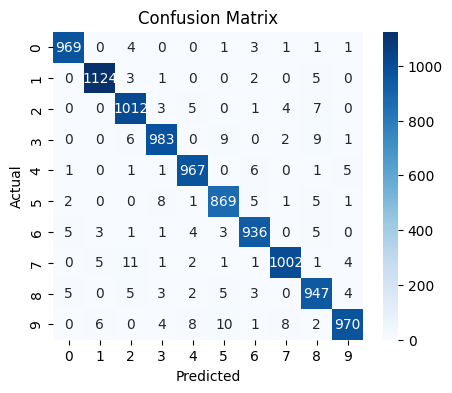

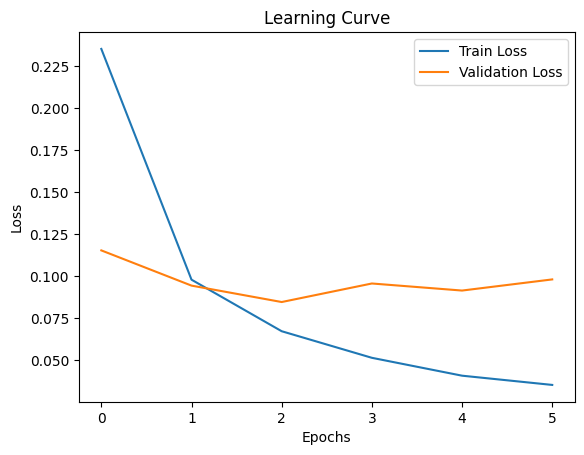

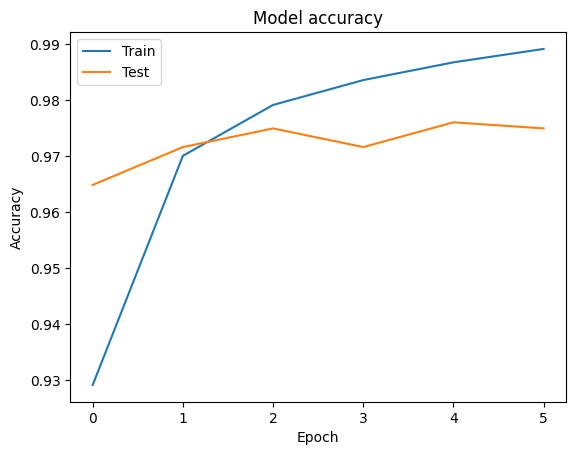

In [ ]:
def build_multiclass_ann():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(28*28,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

multi_class_model = build_multiclass_ann()
history = multi_class_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

multi_class_model.summary()
# Evaluate on test data
y_pred_multi = np.argmax(multi_class_model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_multi))

conf_matrix = confusion_matrix(y_test, y_pred_multi)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=all_digits, yticklabels=all_digits)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

# Plot learning curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Curve')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


## **Model Description**
- here Model has 3 hidden layers, 1 i/p layer and 1 o/p layer.
- hidden layer have ReLU activation function.
- Based on o/p layer softmax beacuse sum of probabilities comes to 1. where as sigmoid keeps probabilities independed 1 or 0 hence softmax was better choice for multi class classification

## **Analysis**
- Accuracy and Recall for multiclass classification is good. also if we look at F1 score it is higher tha 80% hence model is good.
- After 2 epoch gap between validation loss and training loss increases hence model goes into overfitting.
- Since there is use of early stop model was able to maintain generalization
- Similar pattern is observed in accuracy graph

# **Analyzing impact of batch size and learning rate on model accuracy**

Training with batch_size=4, learning_rate=0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with batch_size=4, learning_rate=0.001
Training with batch_size=4, learning_rate=0.0001
Training with batch_size=4, learning_rate=1e-05
Training with batch_size=16, learning_rate=0.01
Training with batch_size=16, learning_rate=0.001
Training with batch_size=16, learning_rate=0.0001
Training with batch_size=16, learning_rate=1e-05
Training with batch_size=32, learning_rate=0.01
Training with batch_size=32, learning_rate=0.001
Training with batch_size=32, learning_rate=0.0001
Training with batch_size=32, learning_rate=1e-05
Training with batch_size=64, learning_rate=0.01
Training with batch_size=64, learning_rate=0.001
Training with batch_size=64, learning_rate=0.0001
Training with batch_size=64, learning_rate=1e-05


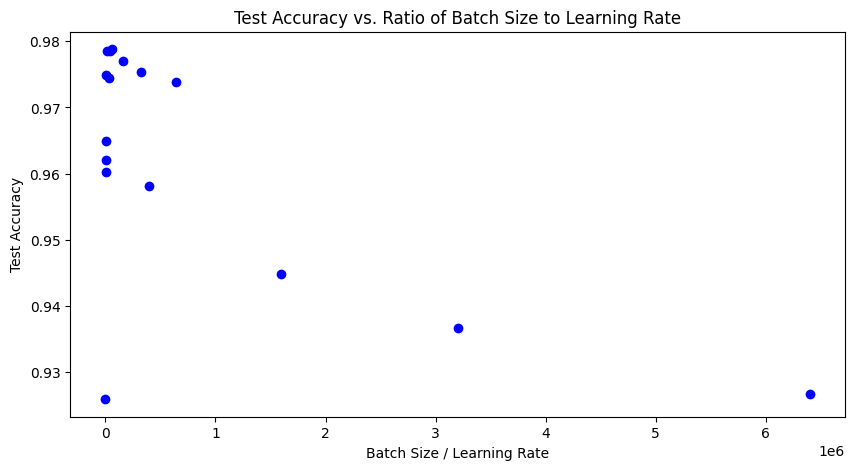

    Batch Size  Learning Rate  Accuracy      Ratio
0            4        0.01000    0.9259      400.0
1            4        0.00100    0.9749     4000.0
2            4        0.00010    0.9786    40000.0
3            4        0.00001    0.9581   400000.0
4           16        0.01000    0.9602     1600.0
5           16        0.00100    0.9785    16000.0
6           16        0.00010    0.9770   160000.0
7           16        0.00001    0.9449  1600000.0
8           32        0.01000    0.9620     3200.0
9           32        0.00100    0.9745    32000.0
10          32        0.00010    0.9754   320000.0
11          32        0.00001    0.9367  3200000.0
12          64        0.01000    0.9650     6400.0
13          64        0.00100    0.9788    64000.0
14          64        0.00010    0.9738   640000.0
15          64        0.00001    0.9267  6400000.0


In [ ]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

batch_sizes = [4, 16, 32, 64]
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
results = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        print(f"Training with batch_size={batch_size}, learning_rate={lr}")
        optimizer = keras.optimizers.Adam(learning_rate=lr)
        model = build_multiclass_ann()
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=batch_size, verbose=0)
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        ratio = batch_size / lr
        results.append({'Batch Size': batch_size, 'Learning Rate': lr, 'Accuracy': test_acc, 'Ratio': ratio})

# Convert results to DataFrame and plot
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
plt.scatter(results_df['Ratio'], results_df['Accuracy'], c='blue')
plt.xlabel('Batch Size / Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Ratio of Batch Size to Learning Rate')
plt.show()

print(results_df)


## **Analysis**
- In Each Batch we can observe that for very high learning rate and very low learning rate model accuracy is decreasing.
- As we increase batch size model accuracy for high learning rate increases. this shows that model overcame overfitting by tuning batch size.
- Trying diffrent combinations of batch size and learning rate shows how hyperparameter tunning affects accuracy and model performance.